Zomoto Price Prediction Analysis:
Zomoto is one of the online food ordering applications, dominating marketplaces in India’s most populous country. Zomato provides restaurant information, menus, and user ratings, as well as food delivery choices from partner restaurants. According to sources, Zomoto is active in over 1,000 Indian cities and towns as of 2022–23. By utilizing the dataset of Banglore, one of the fastest developing cities and one of the most ordered cities online. The dataset of Banglore city hotels listed on Zomoto includes dining information that determines the factor of Average Pricing for 2 people.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files
#data = files.upload()

In [ ]:
data = pd.read_csv("sample_data/zomato.csv")


The shape of Dataset: 51717 rows and 17 columns 51717 different Restaurants at different locations and 17 features of them. The 17 different columns indicate:

URL: The link to the Restaurant Address: The restaurant where it is situated Name: The Name of the Restaurant Online Orders: Whether Online orders are available or not Book Table: Can we book a table at the restaurant Rate: The customer Rating of the restaurant Votes: The number of customers rated the restaurant Phone: The phone number of the restaurant Location: The Area in which the restaurant is located Restaurant Type: The type of restaurant in terms of style Dishes Liked: The most liked dishes of the restaurant Cuisines: The cuisines that they serve Approximate Cost: The cost for 2 people to spend to eat Review List: The reviews of the restaurant Menu Items: The dishes that they serve Listed in type: The Category of restaurant(Delivery/ Dine-Out/Buffet etc…) Listed in city: The name of the area at which they are located in the city

In [ ]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
print(data.info())
stats = data.describe()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
#Looking for missing value
print(data.isna().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
df= data

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

There are missing values in Rate, phone, location, rest type, dish_liked, cuisines, approx cost

In [ ]:
#Duplicate values
print(data.duplicated().sum())

0


No duplicate value present

In [ ]:
data.drop(['url', 'address', 'menu_item', 'phone'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data.shape

(51717, 13)

In [ ]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
print(data.isna().sum())

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
features_na = [i for i in data.columns if data[i].isnull().sum()>0]
features_na

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
for i in features_na:
    print(f"{i} has {np.round((data[i].isnull().sum()/len(data[i])*100),4)}% null values")

rate has 15.0337% null values
location has 0.0406% null values
rest_type has 0.4389% null values
dish_liked has 54.2916% null values
cuisines has 0.087% null values
approx_cost(for two people) has 0.669% null values


Working with Rate columns

In [ ]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As we can see that rating is out of 5. The later part of rating(out of) is of no use to us. So we will drop that part.

In [ ]:
data.dropna(subset=['rate'],axis=0,inplace=True)

In [ ]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def split(x):
    return x.split('/')[0].strip()

In [ ]:
data['rate'] = data['rate'].apply(split)

In [ ]:
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: object

In [ ]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

Furthermore there is 'NEW' and '-' value present in the unqiue value. We can replace this with 0

In [ ]:
data['rate'].replace(['NEW','-'],0,inplace=True)

In [ ]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43942 non-null  object
 1   online_order                 43942 non-null  object
 2   book_table                   43942 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        43942 non-null  int64 
 5   location                     43942 non-null  object
 6   rest_type                    43791 non-null  object
 7   dish_liked                   23609 non-null  object
 8   cuisines                     43931 non-null  object
 9   approx_cost(for two people)  43690 non-null  object
 10  reviews_list                 43942 non-null  object
 11  listed_in(type)              43942 non-null  object
 12  listed_in(city)              43942 non-null  object
dtypes: int64(1), object(12)
memory usage

The datatype of rating is object, we cannot work with object to visualize the plot. So we can convert it into float datatype

In [ ]:
data['rate'] = data['rate'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         43942 non-null  object 
 1   online_order                 43942 non-null  object 
 2   book_table                   43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   votes                        43942 non-null  int64  
 5   location                     43942 non-null  object 
 6   rest_type                    43791 non-null  object 
 7   dish_liked                   23609 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  reviews_list                 43942 non-null  object 
 11  listed_in(type)              43942 non-null  object 
 12  listed_in(city)              43942 non-null  object 
dtypes: float64(1), int64(

Pivot table

In [ ]:
rating = pd.pivot_table(data,index='name',values='rate')
rating

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


In [ ]:
#Finding highest rated 15 restaurants
rating=rating.sort_values(['rate'],ascending=False)
rating[0:15]

,rate
name,
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
O.G. Variar & Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


<ipython-input-32-6b140dc340bb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_rating['rate'], y=top_20_rating.index, orient="h", palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


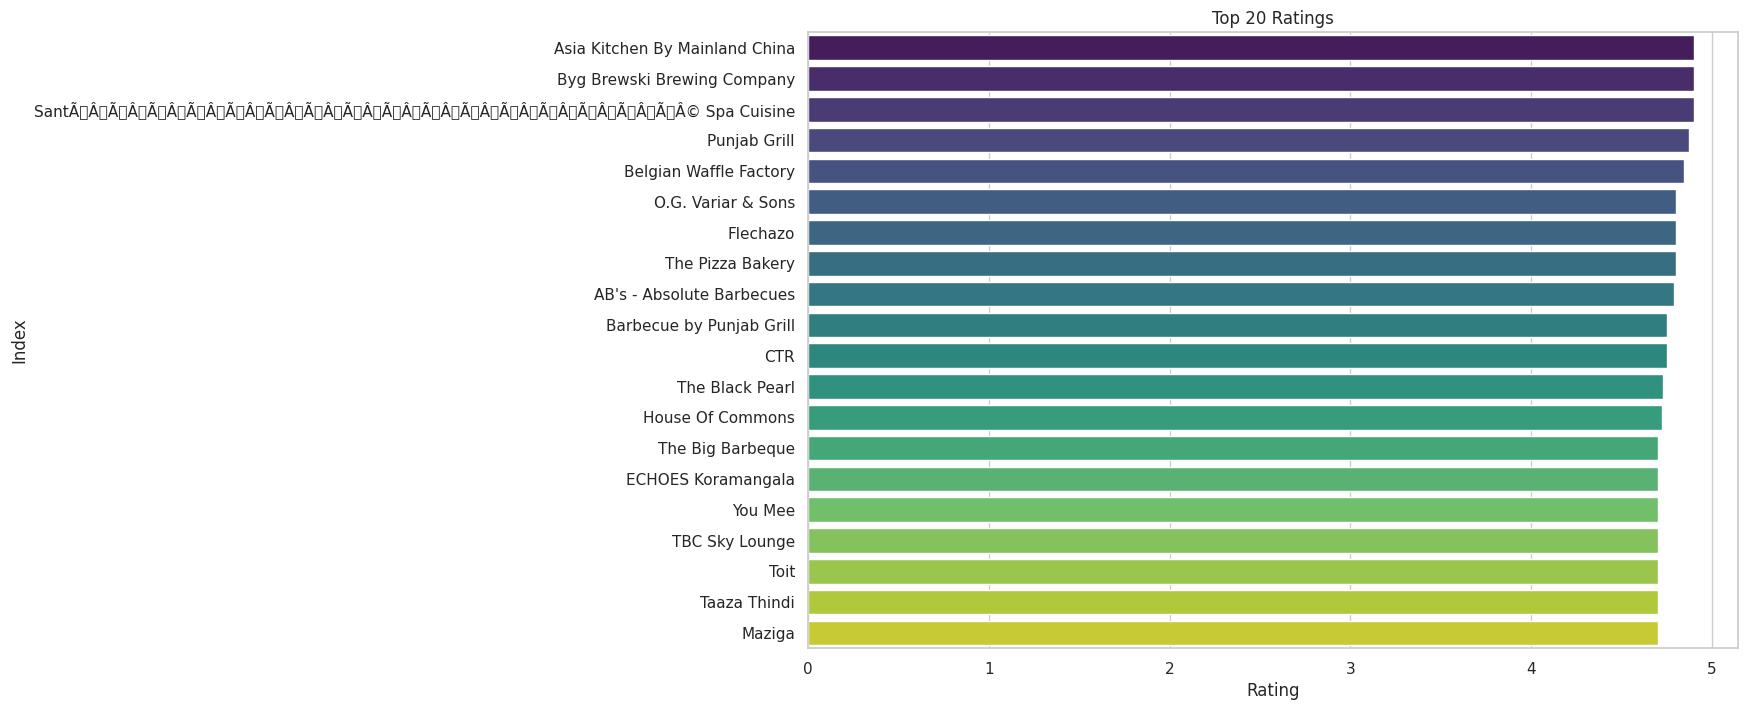

In [ ]:
#Bar plot for 20 highly rated restaurants
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Define data
top_20_rating = rating.iloc[:20]

# Create barplot
ax = sns.barplot(x=top_20_rating['rate'], y=top_20_rating.index, orient="h", palette="viridis")

# Customize labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Index')
ax.set_title('Top 20 Ratings')

# Show plot
plt.show()


<ipython-input-33-1167a0362e93>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rate'])


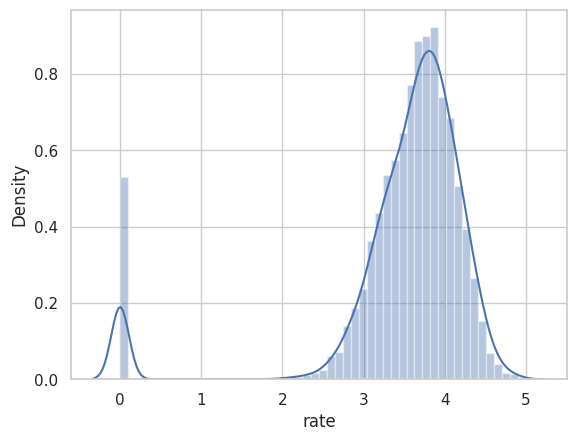

In [ ]:
#Distrubution of rating
sns.set_style('whitegrid')
sns.distplot(data['rate'])

plt.show()

We see two spikes in distrubution, this is not normal distrubution

In [ ]:
#Popular resturant chains based on number of outlets
data['name'].value_counts()


name
Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: count, Length: 7162, dtype: int64

<ipython-input-35-08017bc39aaa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains.values, y=chains.index, palette='viridis')


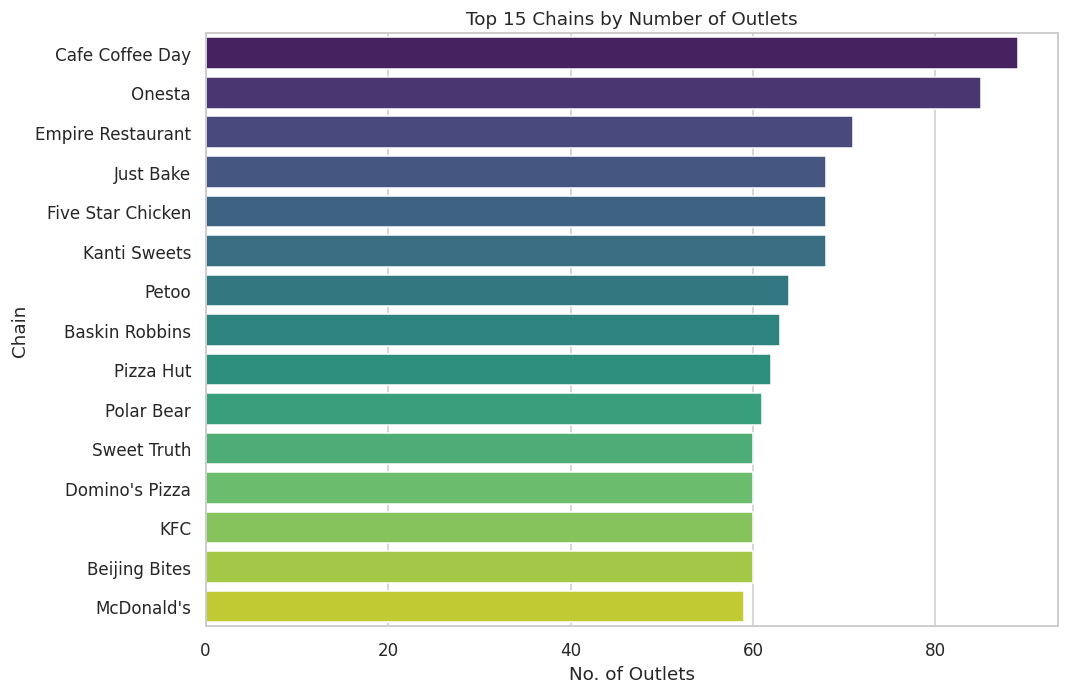

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7), dpi=110)

# Get the data
chains = data['name'].value_counts().head(15)

# Create barplot
sns.barplot(x=chains.values, y=chains.index, palette='viridis')

# Set labels
plt.xlabel("No. of Outlets")
plt.ylabel("Chain")
plt.title("Top 15 Chains by Number of Outlets")

# Show plot
plt.show()


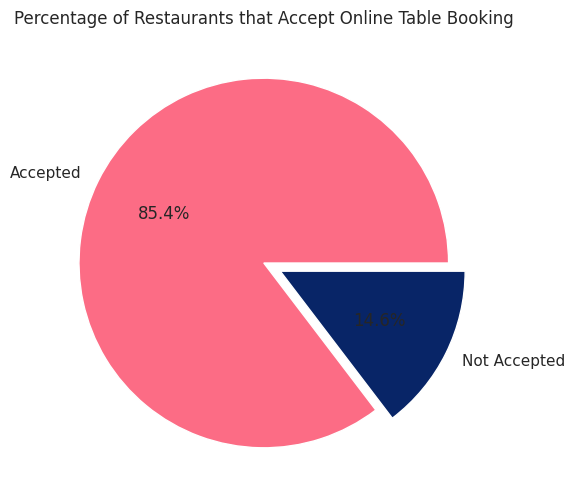

In [ ]:
# percent of restaurant that don't accept online table booking
x = data.book_table.value_counts()
labels = ['Accepted', 'Not Accepted']
colors = ['#FC6C85', '#082567']  # Darker shades of pink and blue

# Plot
plt.figure(figsize=(8, 6))
plt.pie(x, labels=labels, explode=[0.0, 0.1], autopct='%1.1f%%', colors=colors)
# Set font color to white for percentage

plt.title('Percentage of Restaurants that Accept Online Table Booking')
plt.show()

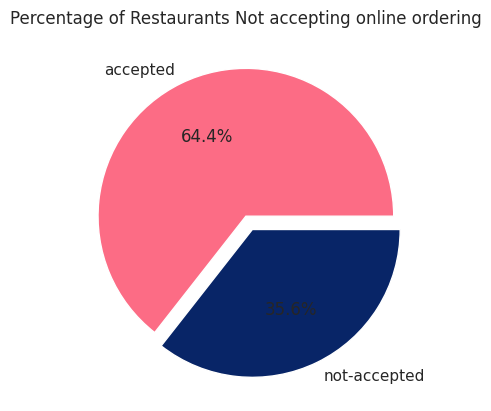

In [ ]:
#prportion of resturants not accepting online ordering
x = data.online_order.value_counts()
labels = ['accepted','not-accepted']
colors = ['#FC6C85', '#082567']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%',colors= colors)
plt.title('Percentage of Restaurants Not accepting online ordering')
plt.show()

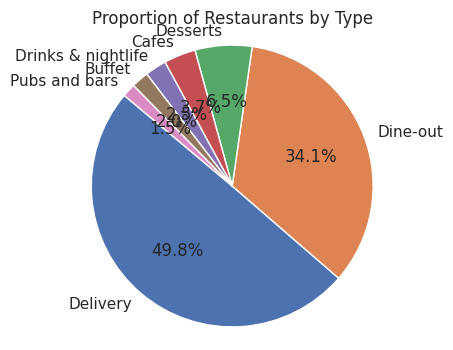

In [ ]:
# Count the number of restaurants in each type
type_counts = data['listed_in(type)'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Restaurants by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
#Analysing resturant types
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [ ]:
len(data.rest_type.unique())

88

88 different type of resturants

In [ ]:
data.rest_type.value_counts()

rest_type
Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

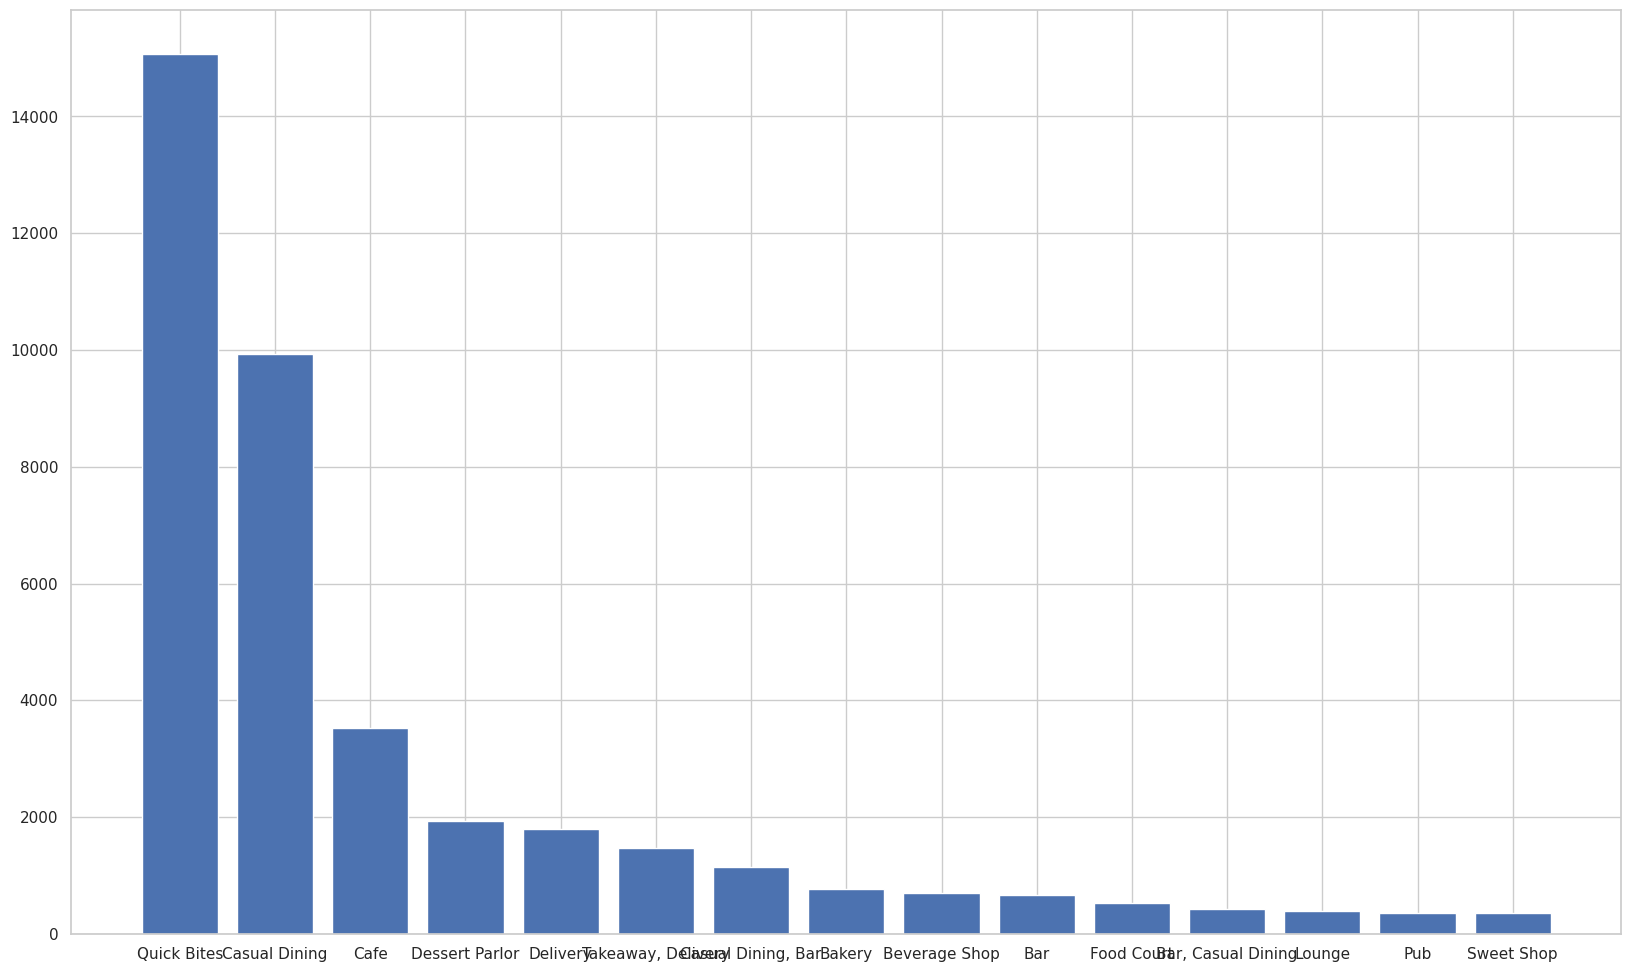

In [ ]:
plt.figure(figsize=(20,12))
rest_typ = data.rest_type.value_counts()[0:15]
plt.bar(rest_typ.index,rest_typ)

plt.show()


Quick bites restaurants have highest count followed by casual dinning.

In [ ]:
#Highest number of voters
voting = data.groupby('name')[['votes']].mean()
voting

,votes
name,
#FeelTheROLL,7.000000
#L-81 Cafe,48.000000
#refuel,37.000000
1000 B.C,49.000000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000
...,...
i-Bar - The Park Bangalore,619.727273
iFruit Live Ice Creams,10.000000
iSpice Resto Cafe,30.142857


In [ ]:
voting['votes'].describe()

count     7162.000000
mean       201.484245
std        607.015608
min          0.000000
25%         10.400000
50%         38.750000
75%        146.797414
max      16588.500000
Name: votes, dtype: float64

In [ ]:
high_vot = voting[voting['votes'] >5000]

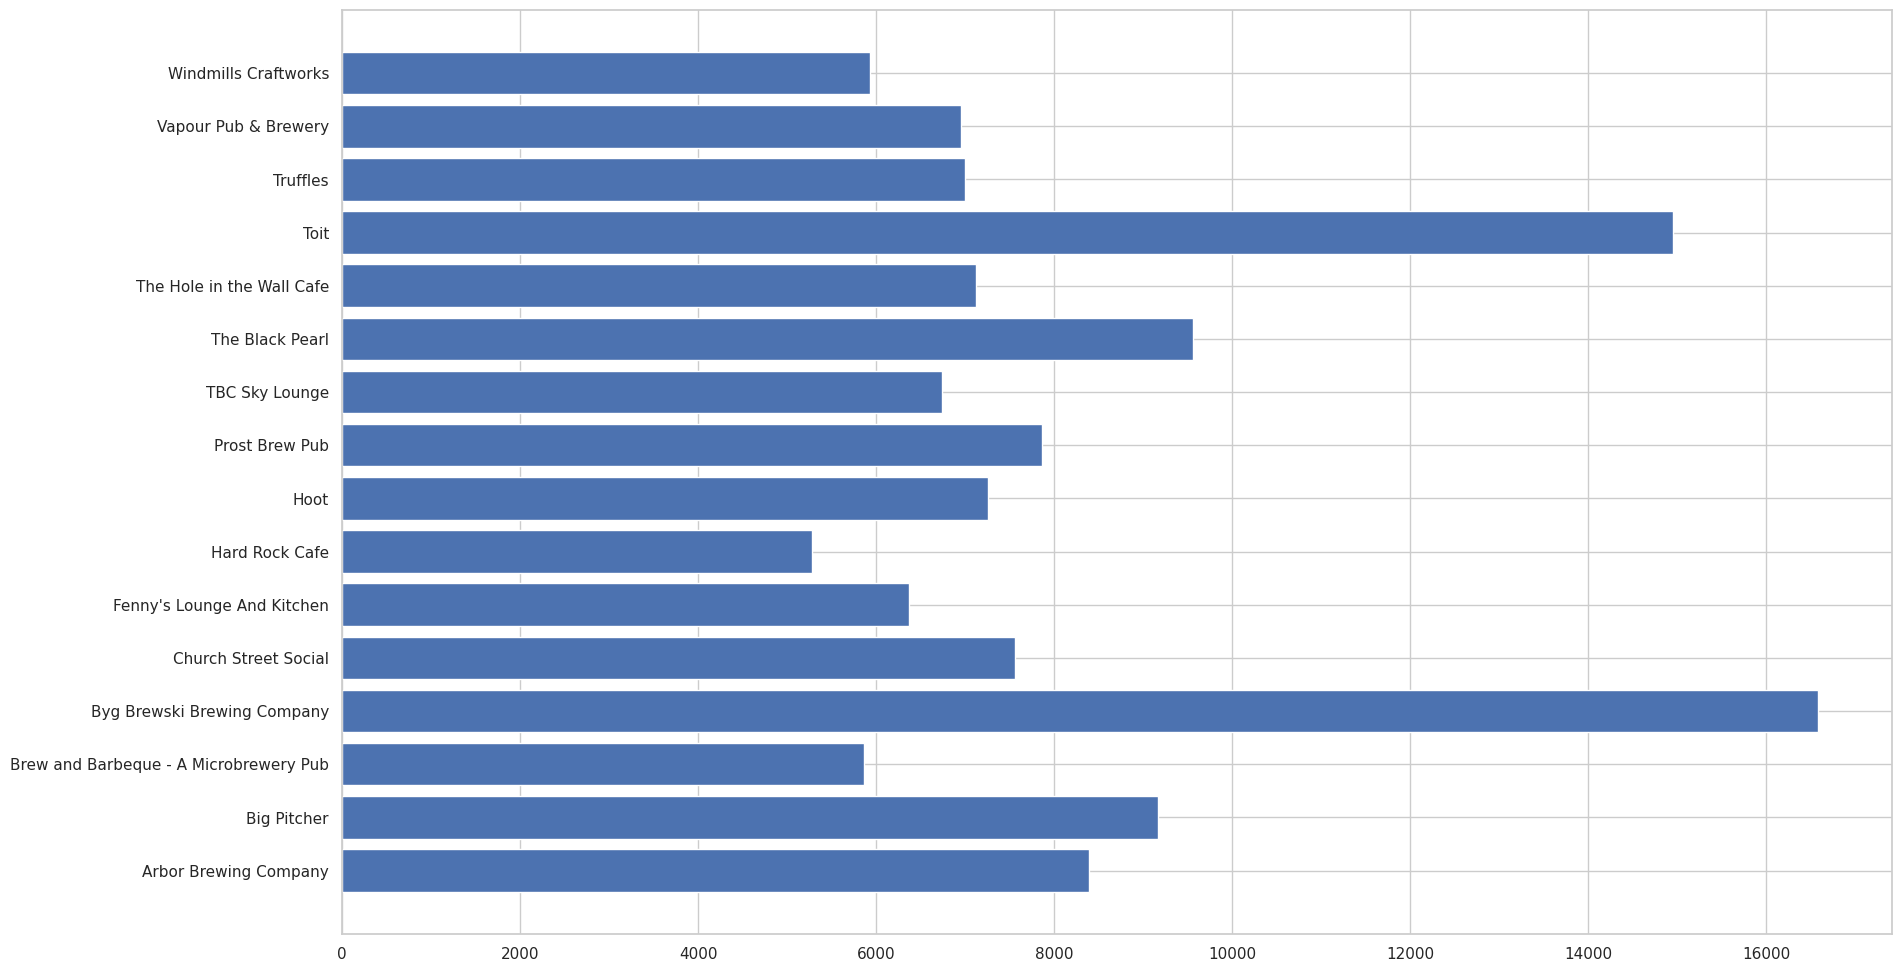

In [ ]:
plt.figure(figsize=(20,12),dpi=100)

plt.barh(high_vot.index,high_vot['votes'])

plt.show()

<ipython-input-47-d546f16f0eff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['votes'])


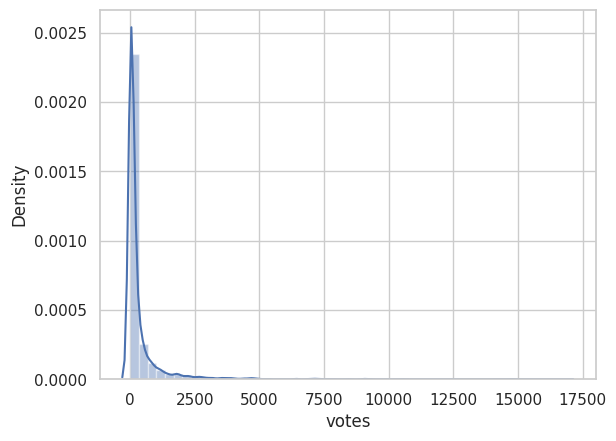

In [ ]:
# Analysis highest rated and lowest rated based on votes
sns.distplot(data['votes'])

plt.show()

In [ ]:
voting_rating = data.groupby('name')[['votes']].mean().sort_values('votes',ascending=False)
voting_rating

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
...,...
NutriFit,0.000000
Cross Roads Inn,0.000000
Crown Resto,0.000000


In [ ]:
voting_rating['name'] = voting_rating.index

In [ ]:
voting_rating = voting_rating.reset_index(drop=True)

voting_rating.head()

,votes,name
0,16588.500000,Byg Brewski Brewing Company
1,14956.000000,Toit
2,9562.333333,The Black Pearl
3,9164.500000,Big Pitcher
4,8396.545455,Arbor Brewing Company


In [ ]:
voting_rating = pd.merge(voting_rating,data[['rate','name']])
voting_rating

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9
...,...,...,...
43937,0.0,Lazzet Lee,0.0
43938,0.0,Lazzet Lee,0.0
43939,0.0,Lazzet Lee,0.0
43940,0.0,Lazzet Lee,0.0


In [ ]:
vote_top = voting_rating[voting_rating['votes'] > 5000]
vote_top.head()

,votes,name,rate
0,16588.5,Byg Brewski Brewing Company,4.9
1,16588.5,Byg Brewski Brewing Company,4.9
2,16588.5,Byg Brewski Brewing Company,4.9
3,16588.5,Byg Brewski Brewing Company,4.9
4,16588.5,Byg Brewski Brewing Company,4.9


In [ ]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate',ascending=False)
vote_top

,rate
name,
Byg Brewski Brewing Company,4.900000
The Black Pearl,4.727778
TBC Sky Lounge,4.700000
Toit,4.700000
Big Pitcher,4.650000
Brew and Barbeque - A Microbrewery Pub,4.620000
The Hole in the Wall Cafe,4.600000
Windmills Craftworks,4.600000
Truffles,4.595349


<ipython-input-54-fc7af32a6e9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_top['rate'], y=vote_top.index, orient='h',palette='viridis')


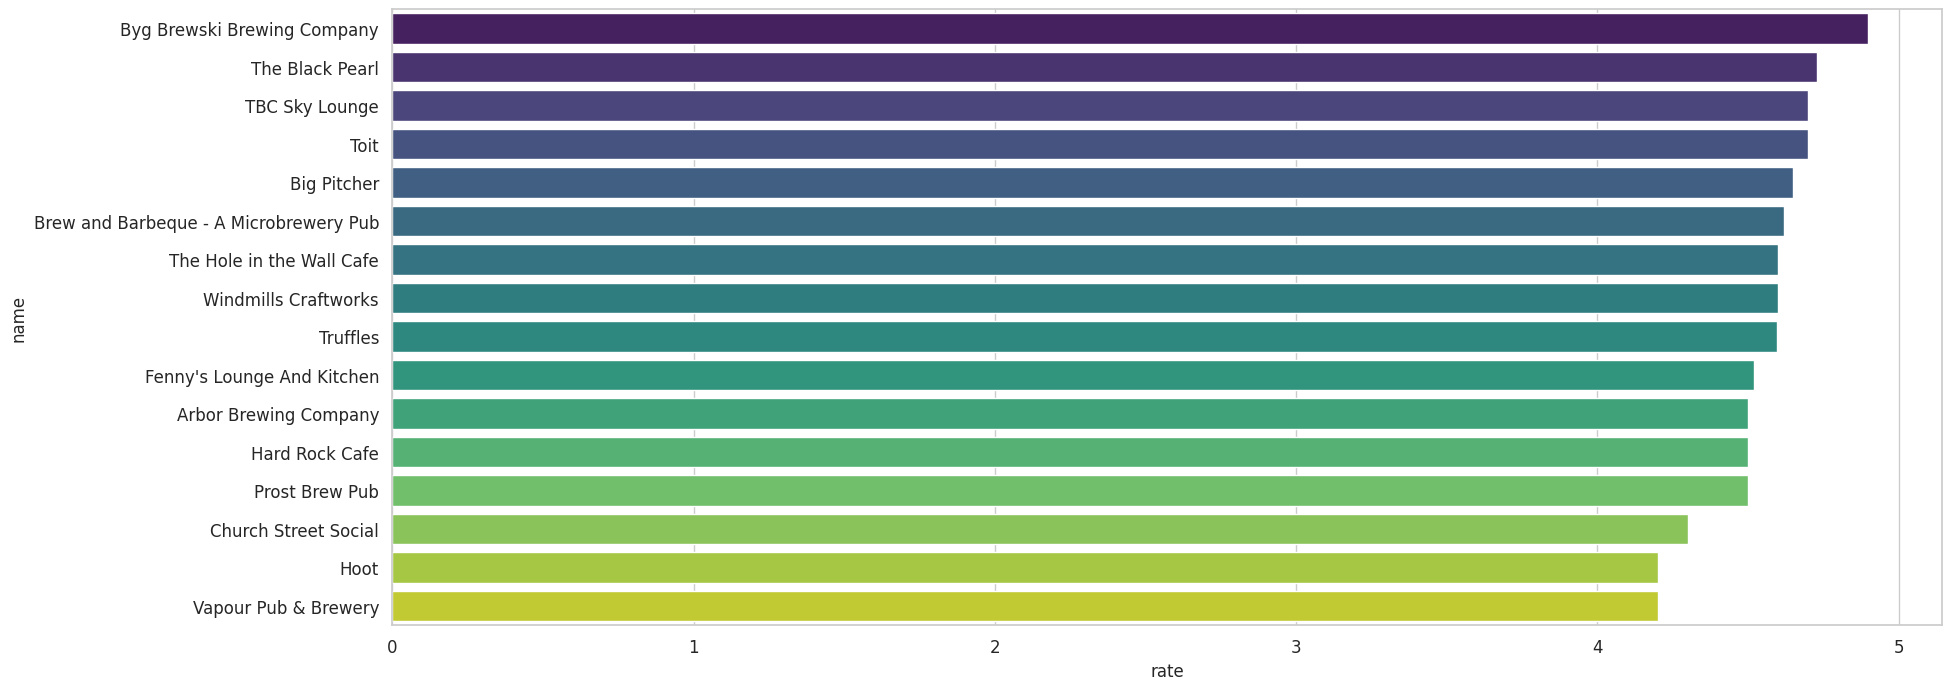

In [ ]:
plt.figure(figsize=(20, 8), dpi=100)

sns.barplot(x=vote_top['rate'], y=vote_top.index, orient='h',palette='viridis')

plt.xticks(fontsize=12)  # Adjust x-axis tick label size
plt.yticks(fontsize=12, rotation=0, ha='right')  # Adjust y-axis tick label size and rotation

plt.show()

In [ ]:
bad_count = voting_rating[(voting_rating['rate'] < 3) & (voting_rating['rate'] > 0)]
bad_count

,votes,name,rate
3725,967.681818,Kritunga Restaurant,2.6
3726,967.681818,Kritunga Restaurant,2.9
3727,967.681818,Kritunga Restaurant,2.9
3742,967.681818,Kritunga Restaurant,2.7
3743,967.681818,Kritunga Restaurant,2.7
...,...,...,...
42110,4.000000,Special Biriyani,2.9
42111,4.000000,Special Biriyani,2.9
42198,4.000000,Sandesh Restaurant,2.9
42311,2.500000,Kushi Meals,2.8


In [ ]:
bad_resturants = bad_count[bad_count['votes'] > 500].groupby('name')[['rate']].mean()
bad_resturants

,rate
name,
Anjappar,2.833333
FreshMenu,2.800000
Kabab Magic,2.900000
Kritunga Restaurant,2.760000
Lakeview Milkbar,2.900000
Lazeez,2.600000
Moriz Restaurant,2.775000
Savoury Restaurant,2.900000
Smoke - The Sizzler House,2.800000


<ipython-input-57-57efa9140e39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= bad_resturants['rate'],y=bad_resturants.index,orient='h',palette='viridis')


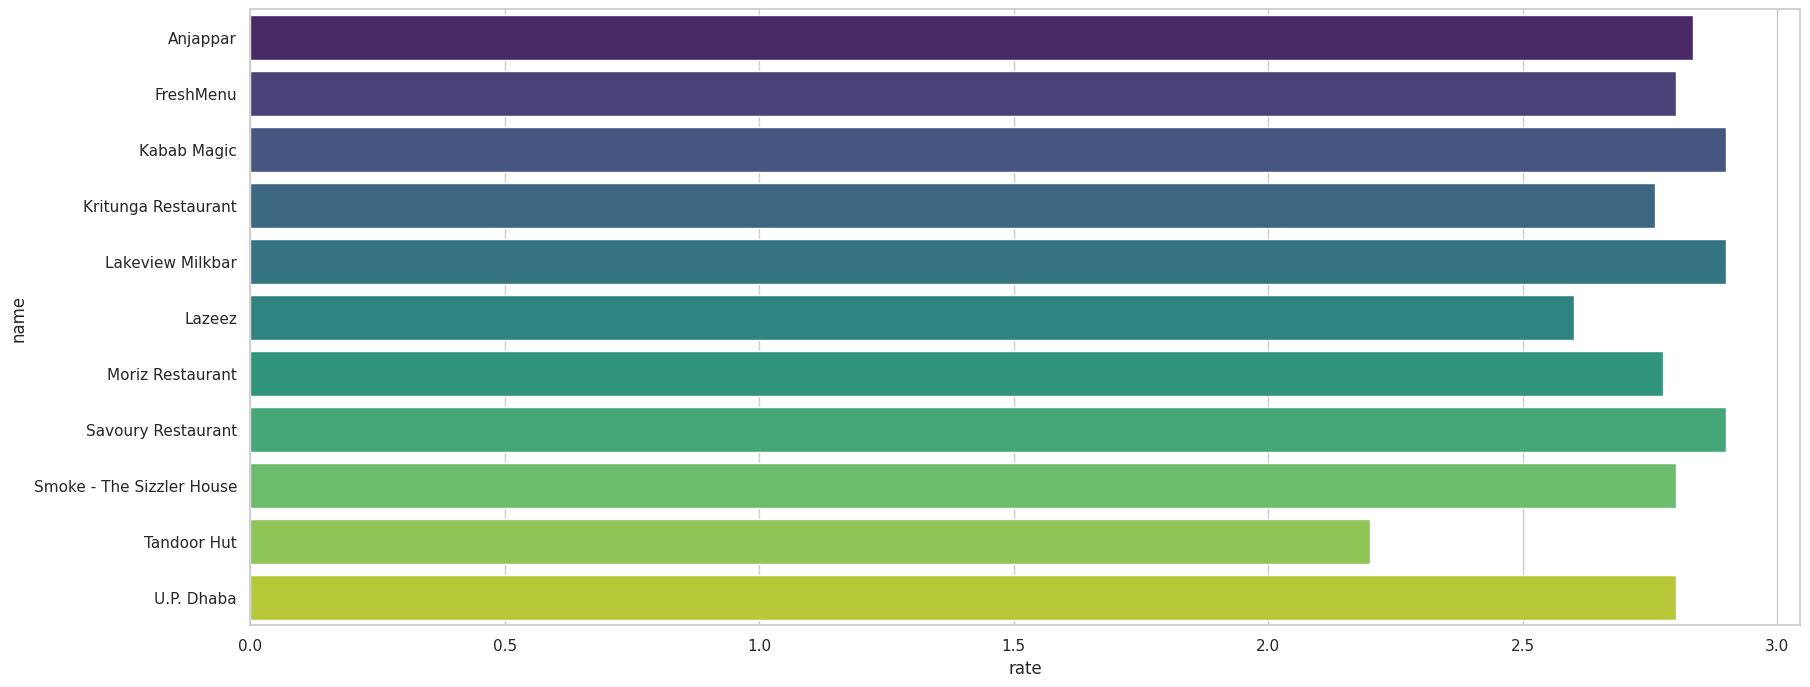

In [ ]:
plt.figure(figsize=(20,8),dpi= 100)

sns.barplot(x= bad_resturants['rate'],y=bad_resturants.index,orient='h',palette='viridis')

plt.show()



# Highest rated cuisines

<ipython-input-58-4a982da72f11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')


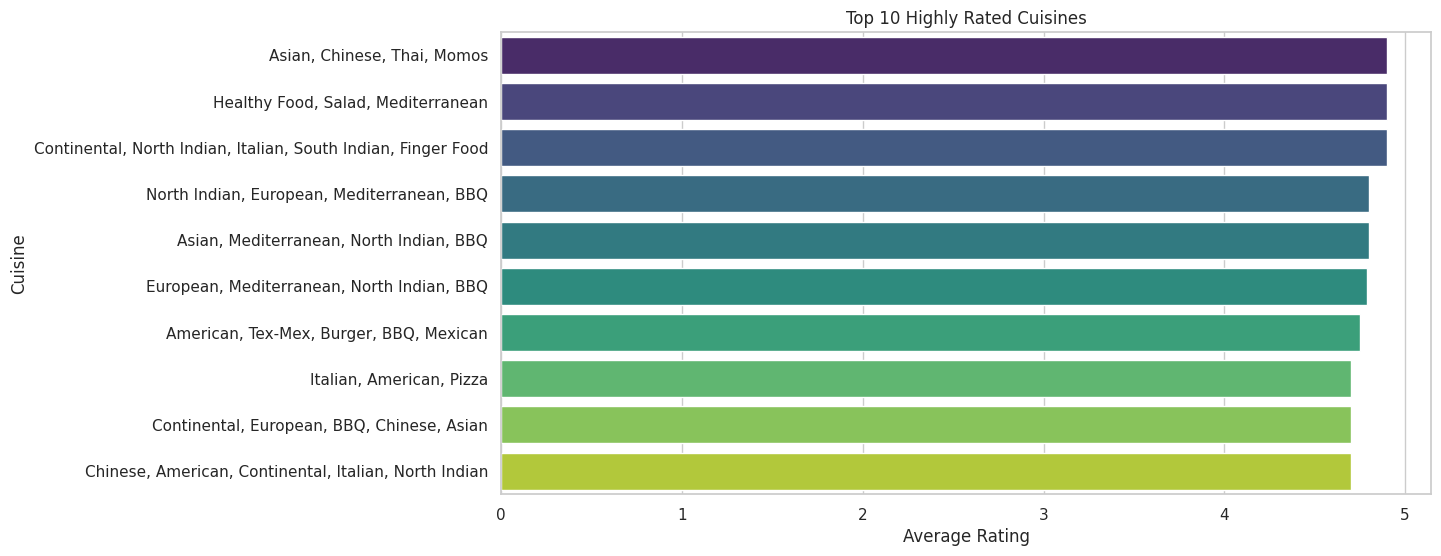

In [ ]:
# Calculate the average rating for each cuisine
cuisine_ratings = data.groupby('cuisines')['rate'].mean().sort_values(ascending=False).head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top 10 Highly Rated Cuisines')
plt.show()

# Lowest Rated Cusinies

<ipython-input-59-432b97ba75ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='inferno')


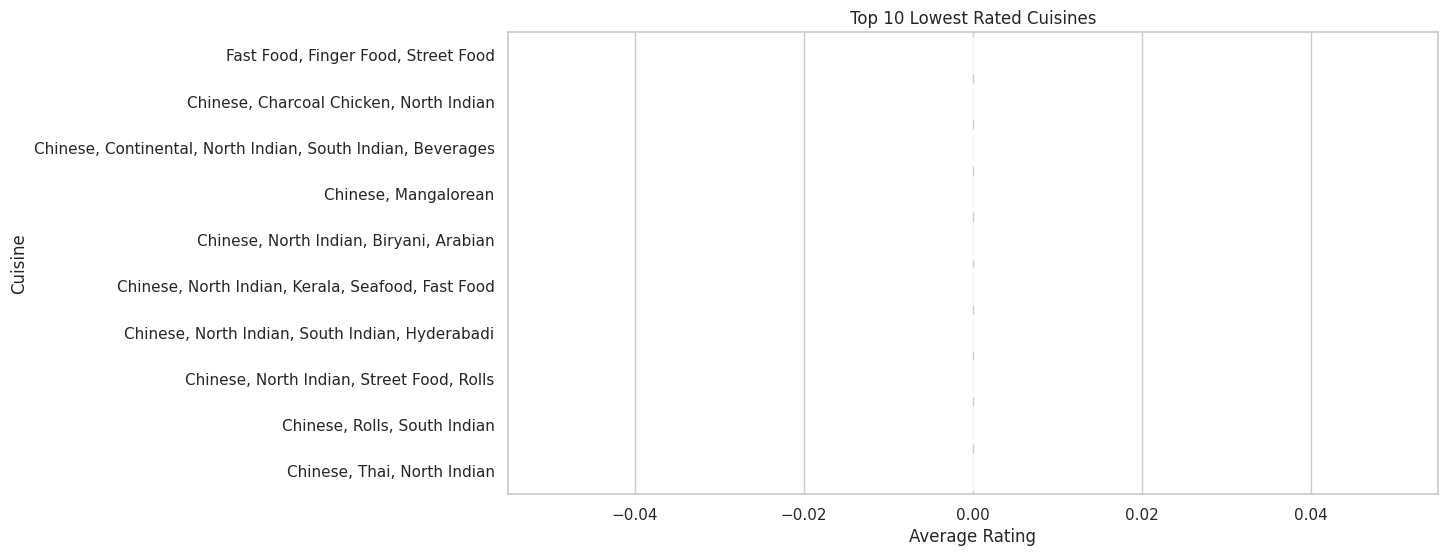

In [ ]:
cuisine_ratings = data.groupby('cuisines')['rate'].mean().sort_values().head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='inferno')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Top 10 Lowest Rated Cuisines')
plt.show()

In [ ]:
# Which location has highest restaurants
location_restro = data[['location']].value_counts()[0:20]
location_restro

location             
BTM                      4261
Koramangala 5th Block    2381
HSR                      2128
Indiranagar              1936
JP Nagar                 1849
Jayanagar                1718
Whitefield               1693
Marathahalli             1503
Bannerghatta Road        1324
Koramangala 6th Block    1111
Koramangala 7th Block    1089
Brigade Road             1084
Bellandur                1078
Koramangala 1st Block     965
Electronic City           964
Sarjapur Road             919
Ulsoor                    901
Koramangala 4th Block     864
MG Road                   836
Banashankari              805
Name: count, dtype: int64

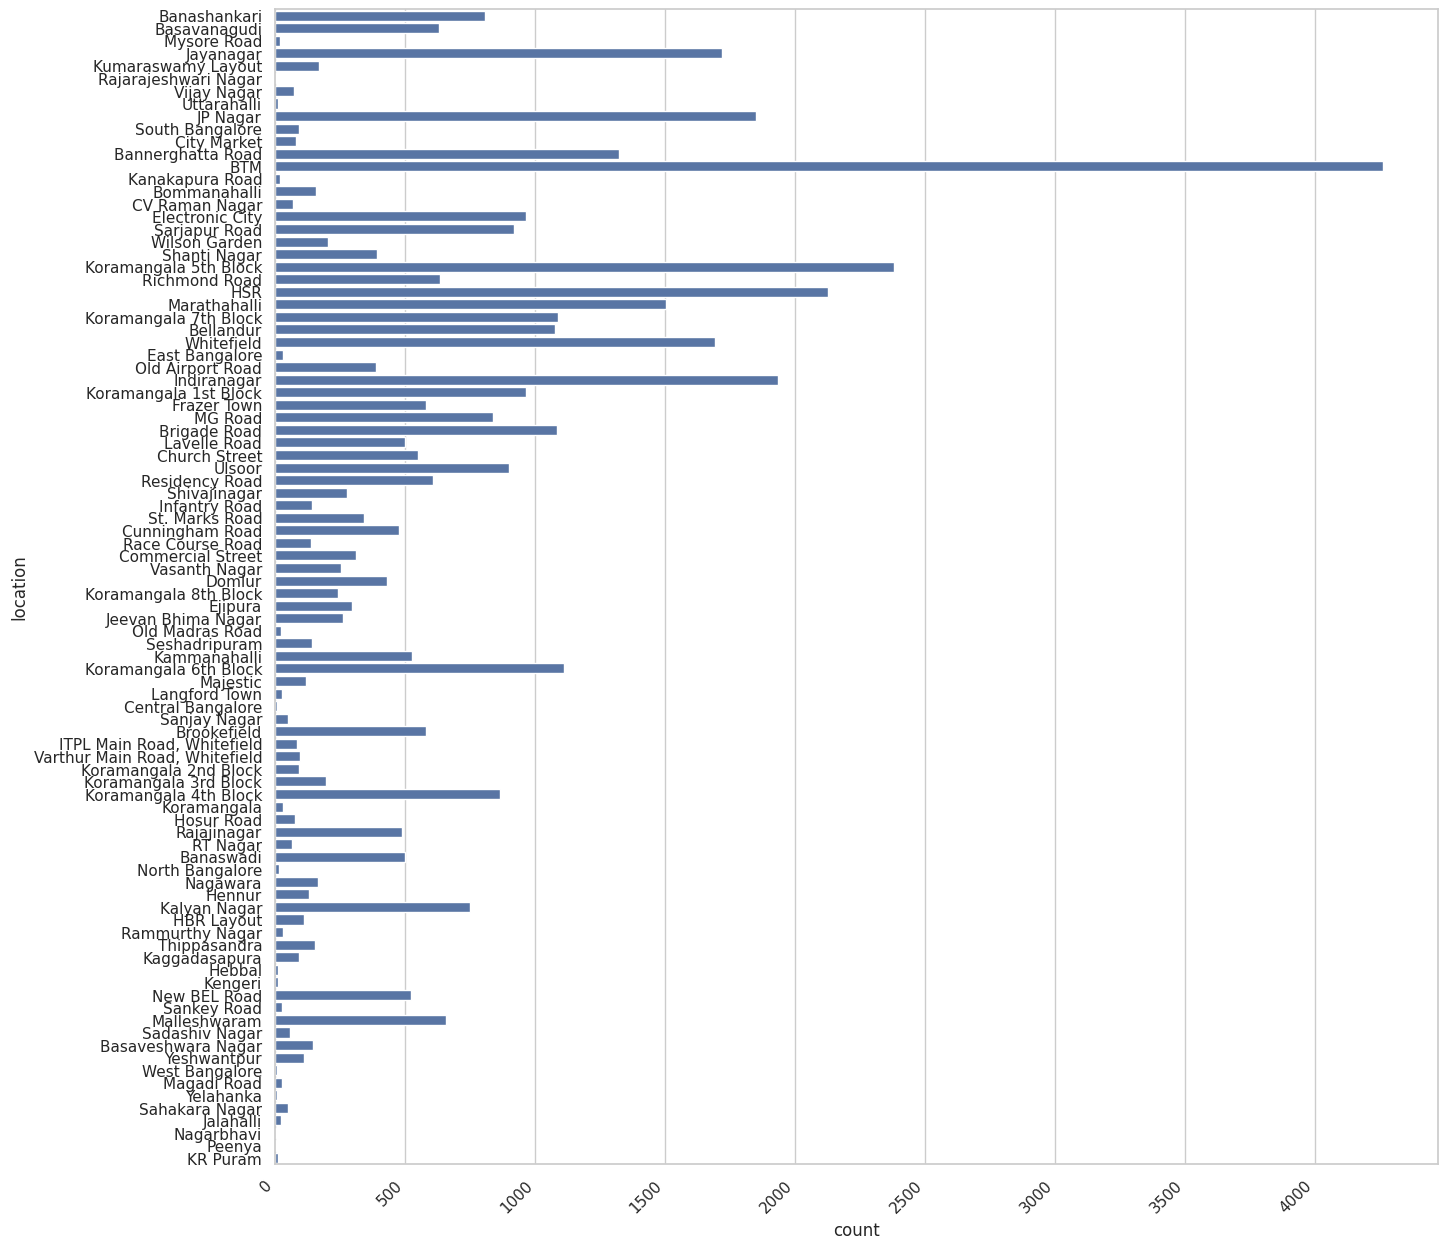

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(data['location'])

plt.xticks(rotation=45, ha='right')  # Rotate the labels by 45 degrees and adjust alignment to the right

plt.show()

cuisines
North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: count, dtype: int64


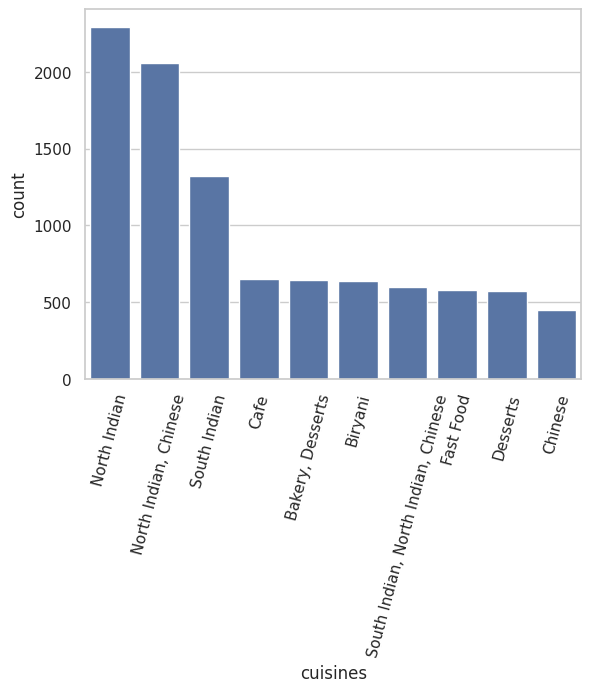

In [ ]:
# What cuisine does people prefer
cusin = data.cuisines.value_counts()[0:10]
print(cusin)
sns.barplot(x=cusin.index,y= cusin)
plt.xticks(rotation=75)
plt.show()

In [ ]:
#Cost for 2 people
data['approx_cost(for two people)'].isna().sum()

252

In [ ]:
data.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
data['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [ ]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [ ]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [ ]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [ ]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int64

<ipython-input-67-cb5c309f1689>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['approx_cost(for two people)'])


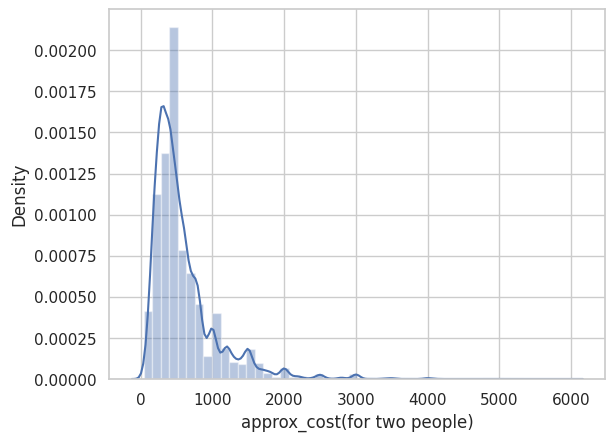

In [ ]:
sns.distplot(data['approx_cost(for two people)'])
plt.show()

In [ ]:
data['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [ ]:
data[data['approx_cost(for two people)'] > 2000]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
3310,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,[],Dine-out,Basavanagudi
3736,Beetle Juice Bar - Springs Hotel & Spa,No,Yes,3.7,64,Basavanagudi,Bar,Rooftop Ambience,Finger Food,2200,[],Drinks & nightlife,Basavanagudi
4820,The Square - Novotel,No,Yes,4.3,760,Marathahalli,Fine Dining,"Breakfast Buffet, Cocktails, Sunday Brunch, No...","Continental, North Indian, Japanese, Italian",2500,"[('Rated 5.0', 'RATED\n Christmas always used...",Dine-out,Bellandur
4861,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,"[('Rated 5.0', 'RATED\n I will visit there la...",Dine-out,Bellandur
4953,Chez Nous - Novotel,No,Yes,3.9,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian",2500,"[('Rated 5.0', 'RATED\n I will visit there la...",Drinks & nightlife,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51666,Bling - The Zuri,No,No,3.7,228,Whitefield,Lounge,"Martini, Cocktails, Paneer Tikka","Continental, North Indian",2100,"[('Rated 3.0', 'RATED\n Happen to visit there...",Drinks & nightlife,Whitefield
51681,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Drinks & nightlife,Whitefield
51685,Biergarten,No,Yes,4.7,7064,Whitefield,"Microbrewery, Pub","Wheat Beer, Risotto, Craft Beer, Caesar Salad,...","Continental, European, BBQ, Chinese, Asian",2400,"[('Rated 3.0', 'RATED\n We had been here on a...",Pubs and bars,Whitefield
51686,Windmills Craftworks,No,No,4.6,5954,Whitefield,"Microbrewery, Pub","Keema Pav, Cocktails, Craft Beer, Pork Chops, ...","American, North Indian, Salad",2500,"[('Rated 5.0', ""RATED\n A review for Windmill...",Pubs and bars,Whitefield


Asia Kitchen By Mainland China,Spa Cuisine,Byg Brewski Brewing Company,Punjab Grill were the best rated Restaurants.

Cafe Coffee Day, Onesta, Empire Restaurant, Just Bake ,Kanti sweets were the top restaurant chains.

64.4% of resturants accept online orders where as 35.6% donot accept online orders.

Based on most voted resaturants Byg Brewski Brewing Company and The Black Pearl were the best rated restaurants.

Based on most voted resaturants Lazeez and Tandoor Hut were the worst rated restaurants.

BTM, Koramangala 5th Block has the most numbers of restaurants.

North Indian and Chinese were the top favourite of the people in Bangalore.

Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.

In [ ]:
def return_budget(location,restaurant,x):
    budget = data[(data['approx_cost(for two people)'] <= x) & (data['location'] == location) & (data['rest_type'] == restaurant) & (data['rate'] > 4)]
    return (budget['name'].unique())

In [ ]:
location = input("Enter your location: ")

# Prompt the user to input restaurant type
restaurant_type = input("Enter the type of restaurant you're looking for: ")

# Prompt the user to input budget
budget = int(input("Enter your budget : "))
#return_budget(location,restaurant_type,budget)
resto = return_budget(location, restaurant_type, budget)


Enter your location: Whitefeild
Enter the type of restaurant you're looking for: Casual DIning
Enter your budget : 1000


In [ ]:
print("\nRestaurants within your budget:")
for resto in resto:
    print(resto)


Restaurants within your budget:


# Building model

In [ ]:
# label encoding online order
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
data['online_order'] = encoder.fit_transform(data['online_order'])

In [ ]:
data['online_order'].unique()

array([1, 0])

In [ ]:
#Label encoding book table column
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['book_table'] = encoder.fit_transform(data['book_table'])

In [ ]:
data['book_table'].unique()

array([1, 0])

In [ ]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'HSR', 'Marathahalli', 'Koramangala 7th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [ ]:
data['location'] = encoder.fit_transform(data['location'])

In [ ]:
data['location'].unique()

array([ 1,  4, 56, 31, 48, 67, 86, 83, 29, 79, 13,  3,  0, 37,  7, 10, 19,
       75, 89, 77, 44, 70, 22, 55, 46,  6, 88, 17, 61, 27, 40, 20, 51,  8,
       50, 12, 82, 69, 78, 28, 80, 15, 65, 14, 85, 16, 47, 18, 32, 62, 76,
       36, 45, 53, 49, 11, 73,  9, 26, 84, 41, 42, 43, 39, 25, 66, 64,  2,
       60, 58, 24, 35, 21, 68, 81, 34, 23, 38, 59, 74, 54, 71,  5, 91, 87,
       52, 90, 72, 30, 57, 63, 33])

In [ ]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [ ]:
data['rest_type'] = encoder.fit_transform(data['rest_type'])

In [ ]:
data['rest_type'].unique()

array([24, 19, 73, 26, 16, 76, 23, 36, 62, 37,  3, 68,  0, 86, 46, 11, 83,
        6, 44,  5, 84, 56, 55, 77, 14, 13, 85, 71, 25, 39, 74, 65, 57,  7,
       50, 17, 87, 45, 82, 63, 54, 75, 69, 30, 58, 43, 53, 32, 52, 29, 60,
       21, 12, 20, 40, 38, 67,  4, 33, 78,  2, 70, 27, 48, 10, 35, 72, 66,
       49, 47, 42, 15, 31, 18, 28,  1, 64, 22,  9, 59, 34, 81, 80, 79, 61,
       51, 41,  8])

In [ ]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
data['cuisines'] = encoder.fit_transform(data['cuisines'])

In [ ]:
data['cuisines'].unique()

array([1992,  860,  689, ..., 2482, 2105, 1751])

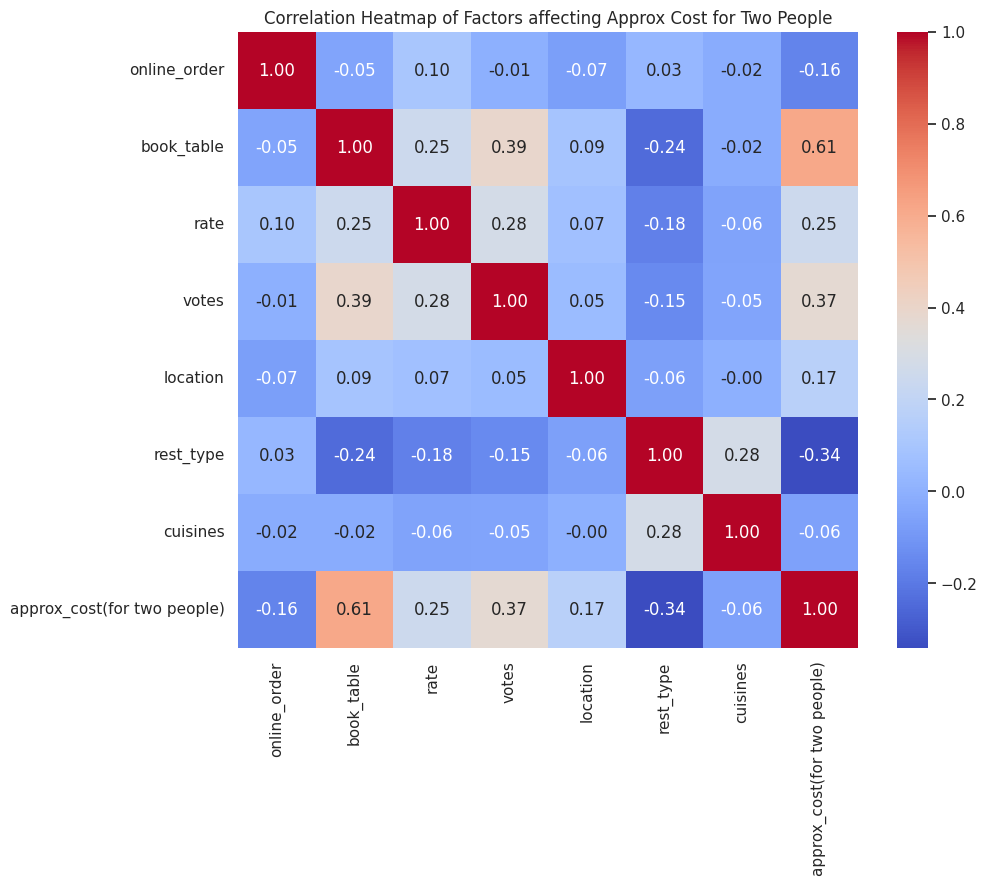

In [ ]:
data_heatmap = data[['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)']]
# Drop non-numeric columns for correlation
data_heatmap_numeric = data_heatmap.select_dtypes(include=['float64', 'int64'])
# Calculating correlation matrix
corr_matrix = data_heatmap.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Factors affecting Approx Cost for Two People')
plt.show()

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
# %% Splitting Data between Independent and Dependent:

X = df[['online_order', 'book_table', 'votes', 'rate', 'listed_in(type)', 'listed_in(city)', 'location', 'cuisines', 'rest_type']]
Y = df['approx_cost(for two people)'].values

In [ ]:
# %% Standardization of continuous data:
from sklearn.preprocessing import  MinMaxScaler
sc = MinMaxScaler()
X.iloc[:, 2:4] = sc.fit_transform(X.iloc[:, 2:4])
Y = sc.fit_transform(Y.reshape((-1, 1)))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [4, 5, 6])], remainder="passthrough")
X_trans = (ct.fit_transform(X).toarray())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
lr = r2_score(Y_test, Y_predict)


In [ ]:
lr

0.5573028181683655

In [ ]:
ET_Model = ExtraTreesRegressor(n_estimators=120, verbose=2, n_jobs=-1)
ET_Model.fit(X_train, Y_train)
Y_predict = ET_Model.predict(X_test)
et = r2_score(Y_test, Y_predict)

<ipython-input-99-83cdc8054e95>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ET_Model.fit(X_train, Y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.2s


building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.4s finished


In [ ]:

RF_Model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=.0001, verbose=2, n_jobs=-1)
RF_Model.fit(X_train, Y_train.ravel())
Y_predict = RF_Model.predict(X_test)
rf = r2_score(Y_test, Y_predict)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 650
building tree 2 of 650
building tree 3 of 650
building tree 4 of 650
building tree 5 of 650
building tree 6 of 650
building tree 7 of 650
building tree 8 of 650
building tree 9 of 650
building tree 10 of 650
building tree 11 of 650
building tree 12 of 650
building tree 13 of 650
building tree 14 of 650
building tree 15 of 650
building tree 16 of 650
building tree 17 of 650
building tree 18 of 650
building tree 19 of 650
building tree 20 of 650
building tree 21 of 650
building tree 22 of 650
building tree 23 of 650
building tree 24 of 650
building tree 25 of 650
building tree 26 of 650
building tree 27 of 650
building tree 28 of 650
building tree 29 of 650
building tree 30 of 650
building tree 31 of 650
building tree 32 of 650
building tree 33 of 650
building tree 34 of 650
building tree 35 of 650
building tree 36 of 650
building tree 37 of 650
building tree 38 of 650
building tree 39 of 650


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.2s


building tree 40 of 650
building tree 41 of 650
building tree 42 of 650
building tree 43 of 650
building tree 44 of 650
building tree 45 of 650
building tree 46 of 650
building tree 47 of 650
building tree 48 of 650
building tree 49 of 650
building tree 50 of 650
building tree 51 of 650
building tree 52 of 650
building tree 53 of 650
building tree 54 of 650
building tree 55 of 650
building tree 56 of 650
building tree 57 of 650
building tree 58 of 650
building tree 59 of 650
building tree 60 of 650
building tree 61 of 650
building tree 62 of 650
building tree 63 of 650
building tree 64 of 650
building tree 65 of 650
building tree 66 of 650
building tree 67 of 650
building tree 68 of 650
building tree 69 of 650
building tree 70 of 650
building tree 71 of 650
building tree 72 of 650
building tree 73 of 650
building tree 74 of 650
building tree 75 of 650
building tree 76 of 650
building tree 77 of 650
building tree 78 of 650
building tree 79 of 650
building tree 80 of 650
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min


building tree 160 of 650
building tree 161 of 650
building tree 162 of 650
building tree 163 of 650
building tree 164 of 650
building tree 165 of 650
building tree 166 of 650
building tree 167 of 650
building tree 168 of 650
building tree 169 of 650
building tree 170 of 650
building tree 171 of 650
building tree 172 of 650
building tree 173 of 650
building tree 174 of 650
building tree 175 of 650
building tree 176 of 650
building tree 177 of 650
building tree 178 of 650
building tree 179 of 650
building tree 180 of 650
building tree 181 of 650
building tree 182 of 650
building tree 183 of 650
building tree 184 of 650
building tree 185 of 650
building tree 186 of 650
building tree 187 of 650
building tree 188 of 650
building tree 189 of 650
building tree 190 of 650
building tree 191 of 650
building tree 192 of 650
building tree 193 of 650
building tree 194 of 650
building tree 195 of 650
building tree 196 of 650
building tree 197 of 650
building tree 198 of 650
building tree 199 of 650


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.0min


building tree 363 of 650
building tree 364 of 650
building tree 365 of 650
building tree 366 of 650
building tree 367 of 650
building tree 368 of 650
building tree 369 of 650
building tree 370 of 650
building tree 371 of 650
building tree 372 of 650
building tree 373 of 650
building tree 374 of 650
building tree 375 of 650
building tree 376 of 650
building tree 377 of 650
building tree 378 of 650
building tree 379 of 650
building tree 380 of 650
building tree 381 of 650
building tree 382 of 650
building tree 383 of 650
building tree 384 of 650
building tree 385 of 650
building tree 386 of 650
building tree 387 of 650
building tree 388 of 650
building tree 389 of 650
building tree 390 of 650
building tree 391 of 650
building tree 392 of 650
building tree 393 of 650
building tree 394 of 650
building tree 395 of 650
building tree 396 of 650
building tree 397 of 650
building tree 398 of 650
building tree 399 of 650
building tree 400 of 650
building tree 401 of 650
building tree 402 of 650


[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.3min


building tree 646 of 650
building tree 647 of 650
building tree 648 of 650
building tree 649 of 650
building tree 650 of 650


[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:  5.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 650 out of 650 | elapsed:    1.2s finished


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(n_estimators=2000, verbosity=3, n_jobs=-1)
xgb_r.fit(X_train, Y_train)
Y_predict = xgb_r.predict(X_test)
xbr = r2_score(Y_test, Y_predict)

[18:00:06] ======== Monitor (0): HostSketchContainer ========
[18:00:06] AllReduce: 0.014393s, 1 calls @ 14393us

[18:00:06] MakeCuts: 0.029467s, 1 calls @ 29467us

[18:00:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[18:00:38] ======== Monitor (0): Learner ========
[18:00:38] Configure: 0.016488s, 1 calls @ 16488us

[18:00:38] EvalOneIter: 0.031361s, 2000 calls @ 31361us

[18:00:38] GetGradient: 0.465887s, 2000 calls @ 465887us

[18:00:38] PredictRaw: 0.004035s, 2000 calls @ 4035us

[18:00:38] UpdateOneIter: 30.7389s, 2000 calls @ 30738910us

[18:00:38] ======== Monitor (0): GBTree ========
[18:00:38] BoostNewTrees: 30.1716s, 2000 calls @ 30171617us

[18:00:38] CommitModel: 0.002883s, 2000 calls @ 2883us

[18:00:38] ======== Monitor (0): HistUpdater ========
[18:00:38] BuildHistogram: 8.55242s, 5555 calls @ 8552423us

[18:00:38] EvaluateSplits: 3.56601s, 7555 calls @ 3566009us

[18:00:38] InitData: 0.436948s, 2000 calls @ 436948us

[18:00:38] InitRoot: 12.4232s, 2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict_knn = knn.predict(X_test)

r2_knn = r2_score(Y_test, Y_predict_knn)

In [ ]:

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=5)

# Fit the model
decision_tree.fit(X_train, Y_train)

# Predict on the test set
Y_predict_dt = decision_tree.predict(X_test)

# Evaluate the model
r2_dt = r2_score(Y_test, Y_predict_dt)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Create base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)

adaboost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_train, Y_train)
Y_predict_adaboost = adaboost.predict(X_test)
r2_adaboost = r2_score(Y_test, Y_predict_adaboost)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

print("The R2 score of Linear Regression: ", lr)
print("The R2 score of Random Forest: ", rf)
print("The R2 score of Extra Tree: ", et)
print("The R2 score of XGB Regression: ", xbr)
print("The R2 score for KNN regression:", r2_knn)
print("The R2 score for Decision Tree regression:", r2_dt)
print("The R2 score for AdaBoost regression:", r2_adaboost)

The R2 score of Linear Regression:  0.5573028181683655
The R2 score of Random Forest:  0.9534907397249511
The R2 score of Extra Tree:  0.9661291564901389
The R2 score of XGB Regression:  0.975469303838933
The R2 score for KNN regression: 0.908479327276246
The R2 score for Decision Tree regression: 0.6543834792937824
The R2 score for AdaBoost regression: 0.25227566586368044
